<a href="https://colab.research.google.com/github/ZuyuanChong/nfs-ml-training-project-2/blob/main/Chong_Zu_Yuan_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv('stock_data.csv')
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


##WordCloud and Feature Creation
Create a word cloud using positive sentiments only.
This checks the mostly used words in the positive reviews/comments.

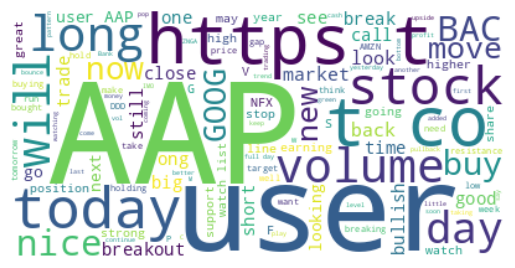

In [99]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
positive_df = df[df['Sentiment']==1]

positive_text = positive_df['Text'].str.cat(sep=' ')

cloud_positives = WordCloud(background_color='white').generate(positive_text)

plt.imshow(cloud_positives, interpolation='bilinear')
plt.axis("off")

plt.show()

##TfidfVectorizer (Build a vectorizer)
Build a TFIDF (term frequency - inverse document frequency) transformation of the 'Text' column in the stock_data dataset.

Initialize a TF-IDF vectorizer object with token pattern of only words (only alphabets) and remove all english stop words. The vectorizer also capture the content of the column in unigrams (single tokens) and bigrams (pairs of neighboring tokens).


I did not use CountVectorizer(Bag of Words) because TFIDF accounts for not only the frequency of a word in a document but also its importance in the entire corpus.

In [100]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

print(df.head())

y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(df["Text"], y, test_size=0.3, random_state=53)

tfidf_vectorizer = TfidfVectorizer(stop_words="english", token_pattern=r'\b[A-Za-z]+\b', ngram_range=(1,2))

tfidf_train = tfidf_vectorizer.fit_transform(X_train)

tfidf_test = tfidf_vectorizer.transform(X_test)

#print(tfidf_vectorizer.get_feature_names_out()[:10])

#print(tfidf_train.A[:5])

text_transformed = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n', text_transformed.head())

                                                Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1
Top 5 rows of the DataFrame: 
     aa  aa ba  aa don  aa earnings  aa goes  aa hold  aa went  aa wfc  aaaand  \
0  0.0    0.0     0.0          0.0      0.0      0.0      0.0     0.0     0.0   
1  0.0    0.0     0.0          0.0      0.0      0.0      0.0     0.0     0.0   
2  0.0    0.0     0.0          0.0      0.0      0.0      0.0     0.0     0.0   
3  0.0    0.0     0.0          0.0      0.0      0.0      0.0     0.0     0.0   
4  0.0    0.0     0.0          0.0      0.0      0.0      0.0     0.0     0.0   

   aaaand goes  ...  zqk  zqk sign  zte  zte ship  zvzqdmlpnw  zynga  \
0          0.0  ...  0.0  

In [101]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

print(df.head())

y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(df["Text"], y, test_size=0.3, random_state=53)

count_vectorizer = CountVectorizer(stop_words="english")

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

text_transformed = pd.DataFrame(count_train.toarray(), columns=count_vectorizer.get_feature_names_out())
print('Top 5 rows of the DataFrame: \n', text_transformed.head())

                                                Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1
Top 5 rows of the DataFrame: 
    00  000  000x  001  0025  00pm  01  02  028  02bn0859cg  ...  zuf7n9eus5  \
0   0    0     0    0     0     0   0   0    0           0  ...           0   
1   0    0     0    0     0     0   0   0    0           0  ...           0   
2   0    0     0    0     0     0   0   0    0           0  ...           0   
3   0    0     0    0     0     0   0   0    0           0  ...           0   
4   0    0     0    0     0     0   0   0    0           0  ...           0   

   zvzqdmlpnw  zynga  zzzactly  œbond  œhysteresisâ  œi  œpandemic  œwe  œyou  
0           0      0         0

Calculate the difference in columns between tfidfvectorizer and countvectorizer and check whether they are equal.

In [102]:
# Comparison
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

print(count_df.head())

print(tfidf_df.head())

difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

print(count_df.equals(tfidf_df))

   00  000  000x  001  0025  00pm  01  02  028  02bn0859cg  ...  zuf7n9eus5  \
0   0    0     0    0     0     0   0   0    0           0  ...           0   
1   0    0     0    0     0     0   0   0    0           0  ...           0   
2   0    0     0    0     0     0   0   0    0           0  ...           0   
3   0    0     0    0     0     0   0   0    0           0  ...           0   
4   0    0     0    0     0     0   0   0    0           0  ...           0   

   zvzqdmlpnw  zynga  zzzactly  œbond  œhysteresisâ  œi  œpandemic  œwe  œyou  
0           0      0         0      0             0   0          0    0     0  
1           0      0         0      0             0   0          0    0     0  
2           0      0         0      0             0   0          0    0     0  
3           0      0         0      0             0   0          0    0     0  
4           0      0         0      0             0   0          0    0     0  

[5 rows x 7948 columns]
    aa  aa ba  aa do

I chose to use TfidfVectorizer at the end because TFIDF accounts for not only the frequency of a word in a document but also its importance in the entire corpus.

##Build a classifier
I chose to use logistic regression as the accuracy score of the logistic regression model is higher than the multinomial naive bayes model. I chose to use these two models as they are simple and effective for binary classification/prediction problems.

Both Naive Bayes and Logistic regression are linear classifiers.
Logistic Regression makes a prediction for the probability using a direct functional form where as Naive Bayes figures out how the data was generated given the results.

In [103]:
# Multinomial Naive Bayes Model
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

nb_classifier.fit(tfidf_train, y_train)

pred = nb_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print("Accuracy score:", score)

cm = metrics.confusion_matrix(y_test, pred)
print("Confusion matrix: ", cm)

Accuracy score: 0.7410817031070196
Confusion matrix:  [[ 191  416]
 [  34 1097]]


Text(50.722222222222214, 0.5, 'Truth')

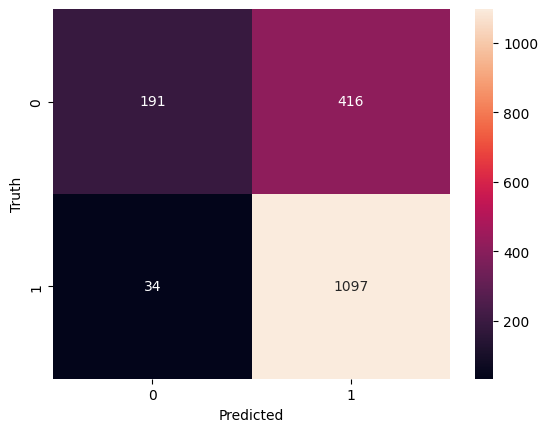

In [104]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Finding the best alpha level that gives the highest accuracy score for the multinomial naive bayes model

In [105]:
import numpy as np

alphas = np.arange(0, 1, 0.1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.7508630609896433

Alpha:  0.1
Score:  0.7738780207134638

Alpha:  0.2
Score:  0.7761795166858458

Alpha:  0.30000000000000004
Score:  0.7761795166858458

Alpha:  0.4
Score:  0.7686996547756041

Alpha:  0.5
Score:  0.7635212888377445

Alpha:  0.6000000000000001
Score:  0.757192174913694

Alpha:  0.7000000000000001
Score:  0.7525891829689298

Alpha:  0.8
Score:  0.7485615650172612

Alpha:  0.9
Score:  0.7433831990794016



/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha=0.2 and 0.3 will give the highest accuracy score

In [106]:
# Best Multinomial NB model
nb_classifier = MultinomialNB(alpha=0.2)

nb_classifier.fit(tfidf_train, y_train)

pred = nb_classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print("Accuracy score:", score)

cm = metrics.confusion_matrix(y_test, pred)
print("Confusion matrix: ", cm)

Accuracy score: 0.7761795166858458
Confusion matrix:  [[ 321  286]
 [ 103 1028]]


Text(50.722222222222214, 0.5, 'Truth')

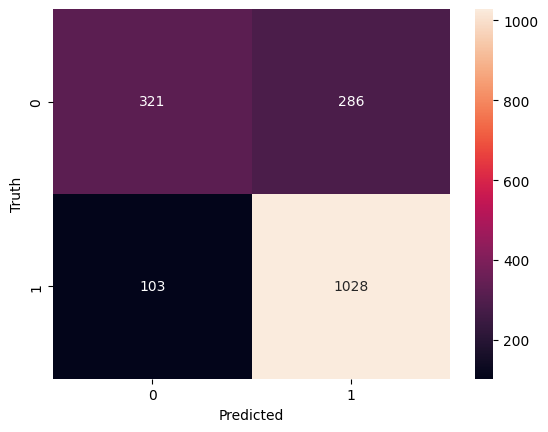

In [107]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [108]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(tfidf_train, y_train)
pred = logreg.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print("Accuracy score:", score)

cm = metrics.confusion_matrix(y_test, pred)
print("Confusion matrix: ", cm)

Accuracy score: 0.7623705408515535
Confusion matrix:  [[ 316  291]
 [ 122 1009]]


Text(50.722222222222214, 0.5, 'Truth')

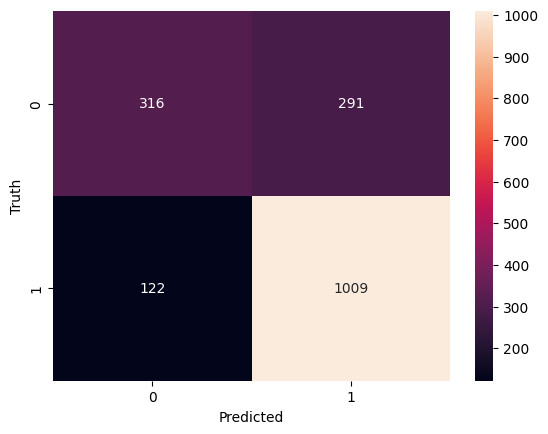

In [109]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Finding the best C (an user adjustable parameter that controls regularisation) that gives the highest accuracy score for the logistic regression model.

Higher values of C will instruct our model to fit the training set as best as possible, while lower C values will favour a simple models with coefficients closer to zero.

In [110]:
Cs = np.array([0.1, 1, 5, 10 ,15, 20, 50])

def train_and_predict(c):
    logreg = LogisticRegression(C=c)
    logreg.fit(tfidf_train, y_train)
    pred = logreg.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

for c in Cs:
    print('C: ', c)
    print('Score: ', train_and_predict(c))
    print()

C:  0.1
Score:  0.6749136939010357

C:  1.0
Score:  0.7623705408515535

C:  5.0
Score:  0.7871116225546605

C:  10.0
Score:  0.7876869965477561

C:  15.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score:  0.7888377445339471

C:  20.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score:  0.786536248561565

C:  50.0
Score:  0.7848101265822784



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=10 will give the highest accuracy score for the logistic regression model.

In [111]:
# Best LR model
# Final model
logreg = LogisticRegression(C=10)
logreg.fit(tfidf_train, y_train)
pred = logreg.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)
print("Accuracy score:", score)

cm = metrics.confusion_matrix(y_test, pred)
print("Confusion matrix: ", cm)

Accuracy score: 0.7876869965477561
Confusion matrix:  [[402 205]
 [164 967]]


Text(50.722222222222214, 0.5, 'Truth')

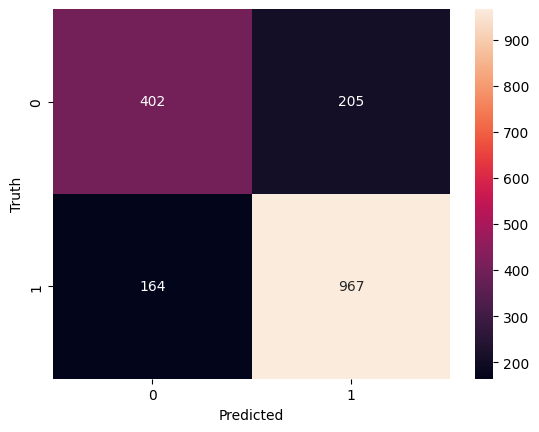

In [112]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The accuracy score of the logistic regression model with C=10 is higher than the accuracy score of the multinomial naive bayes model with alpha=0.2.
Hence, I will choose this logistic regression model as my final model.